In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner import Plot

In [2]:
OptInfo = {}
X     = [230,360]
Y     = [-80,-40]
d     = [5,2.5]
OptInfo['Start Time']           = '2017-03-15'
OptInfo['End Time']             = '2017-03-16'
OptInfo['WayPoints']            = '../../resources/WayPoints.csv'
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'

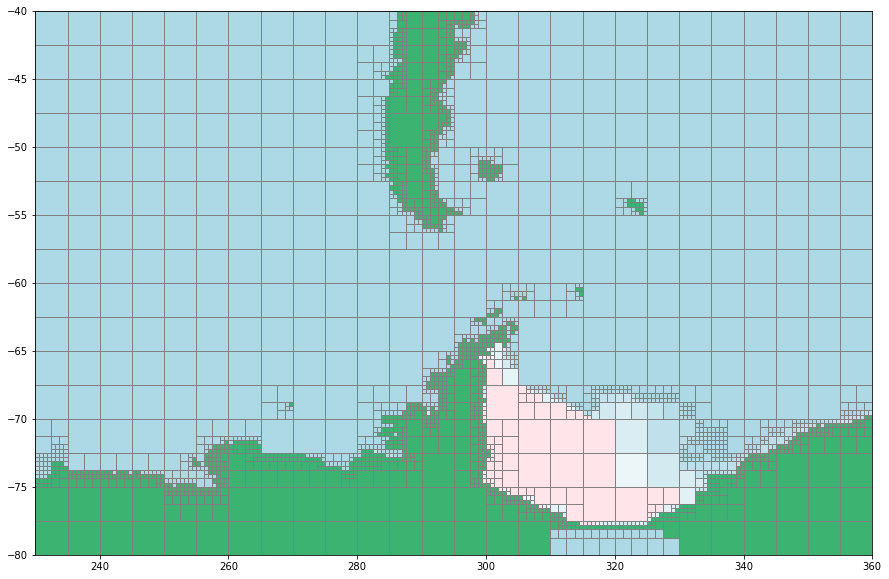

In [35]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(X[0],X[1],Y[0],Y[1],d[0],d[1])
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(3)
Plot.Mesh(cellGrid)

=== Processing Waypoint = Palmer ===


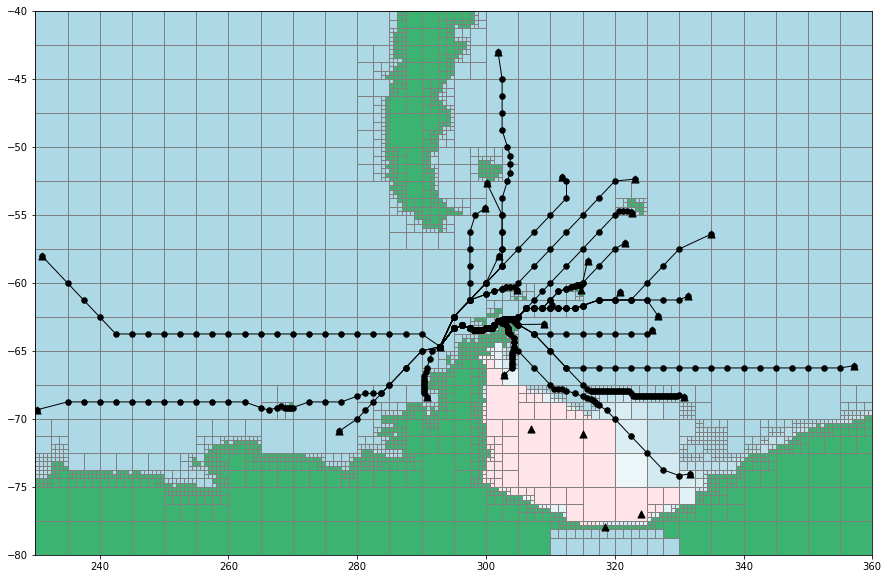

In [36]:
TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(StartWaypoint='Palmer',verbrose=True)
Plot.Paths(cellGrid,Paths,routepoints=True,Waypoints=TT.OptInfo['WayPoints'])

In [51]:
SmoothedPaths = TT.PathSmoothing(Paths[7:15],maxiter=100)

 PATH: Palmer -> ArgentineSea 


/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-pyRoutePlanner/RoutePlanner/Function.py:576: RuntimeWarning: invalid value encountered in double_scalars
  dX2 = (-r2*(D2*v2 + r2*C2*(Y-y)))/X2


 PATH: Palmer -> BellingshausenSea 


/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-pyRoutePlanner/RoutePlanner/Function.py:463: RuntimeWarning: invalid value encountered in double_scalars
  dX1 = (D1*v1 + C1*y + dzl*(D1*u1 + C1*zl))/X1


 PATH: Palmer -> MargueriteBay 
 PATH: Palmer -> Brunt 
 PATH: Palmer -> NorthernWeddellSea 
 PATH: Palmer -> NorthWestGeorgiaRise 
 PATH: Palmer -> ShagRocksPassage 
 PATH: Palmer -> ElephantIsland 


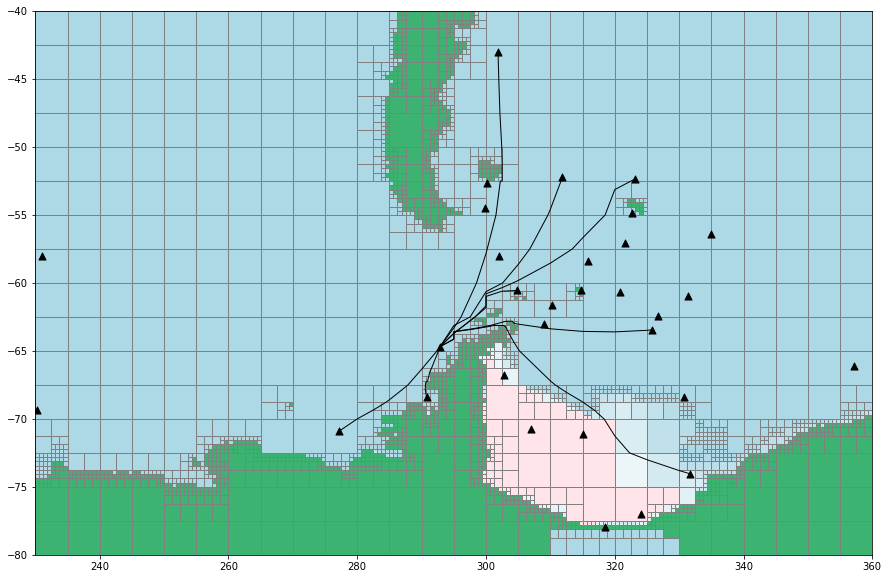

In [52]:
ax = Plot.Paths(cellGrid,SmoothedPaths,routepoints=False,Waypoints=TT.OptInfo['WayPoints'],return_ax=True)
# ax.set_ylim([-77,None])
# ax.set_xlim([290,None])